### 画像データの前処理

#### データの読み込み

In [4]:
# OpenCVのインストール

!pip install opencv-python

(261, 280, 3)


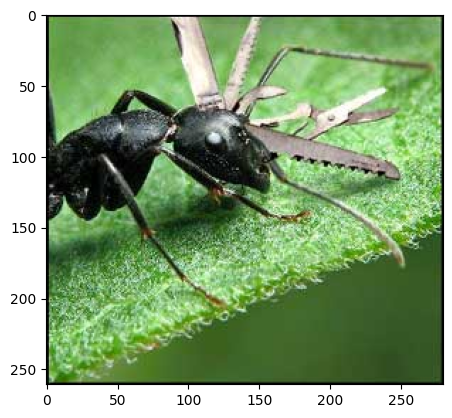

In [5]:
# 蟻の画像の1つ(swiss-army-ant.jpg)の読み込み

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data_03/ants/swiss-army-ant.jpg')
print(img.shape) # (縦，横，チャンネル数)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# ピクセル値

print(img)

[[[ 60   4  33]
  [ 28   0  10]
  [ 12   7   9]
  ...
  [  4   2   0]
  [ 13   0   2]
  [ 17   0   4]]

 [[ 28   0  10]
  [ 16   0   6]
  [ 21  33  27]
  ...
  [ 15  27  15]
  [ 19  18  14]
  [  4   0   0]]

 [[ 18  12  17]
  [ 24  35  32]
  [ 92 139 117]
  ...
  [127 165 143]
  [ 99 124 110]
  [ 11  33  21]]

 ...

 [[  0  10   0]
  [  6  34   5]
  [ 95 132  94]
  ...
  [ 45  85  57]
  [ 33  66  39]
  [  0  11   0]]

 [[  0  14   0]
  [  3  29   6]
  [115 147 116]
  ...
  [ 39  67  47]
  [ 39  61  42]
  [  0  15   0]]

 [[  0   1   0]
  [  0   3   0]
  [ 34  47  33]
  ...
  [ 10  19  16]
  [ 19  19  19]
  [  2   0   0]]]


In [7]:
print(len(img)) # 配列全体のサイズ = 縦のサイズ
print(len(img[0])) # 1行目の配列のサイズ = 横のサイズ
print(len(img[0][0])) # 1行目1列目のサイズ = カラーチャネル数

261
280
3


#### ピクセル値の確認

In [8]:
import pandas as pd

b, g, r = cv2.split(img)

# 青のピクセル値をデータフレームに格納

b_df = pd.DataFrame(b)
print(b_df.shape)
b_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,60,28,12,0,0,0,1,0,0,0,...,2,0,0,6,0,0,0,4,13,17
1,28,16,21,0,0,0,0,0,0,0,...,1,0,0,0,0,2,12,15,19,4
2,18,24,92,81,83,69,86,89,89,85,...,116,113,119,115,107,120,125,127,99,11
3,0,0,82,77,74,60,75,78,72,71,...,109,108,107,97,96,110,116,130,92,0
4,0,0,84,75,66,55,67,69,70,68,...,96,94,93,87,90,102,109,135,105,0


(261, 280)


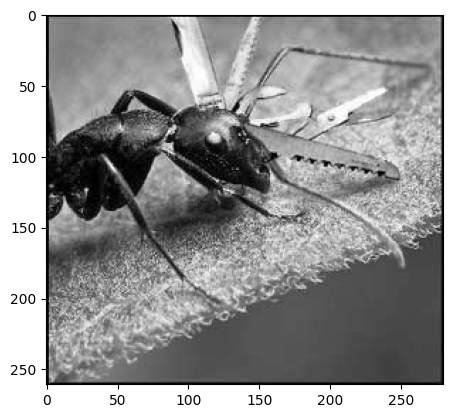

In [9]:
# グレースケールにしてからピクセル値を配列に格納

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)

plt.imshow(gray_img, cmap='gray')
plt.show()

In [10]:
# データフレームに格納して表示

gr_df = pd.DataFrame(gray_img)
print(gr_df.shape)
gr_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,19,6,8,3,8,6,9,3,5,5,...,1,1,2,13,4,4,2,2,2,3
1,6,4,30,14,21,11,12,6,12,12,...,10,9,6,12,9,18,24,22,17,0
2,14,33,127,131,138,122,130,130,130,129,...,146,145,153,150,144,155,157,154,117,27
3,3,16,132,143,145,129,135,135,129,129,...,152,152,153,145,144,158,159,167,122,6
4,6,22,139,146,144,131,133,131,134,134,...,144,144,143,138,141,153,155,176,139,14


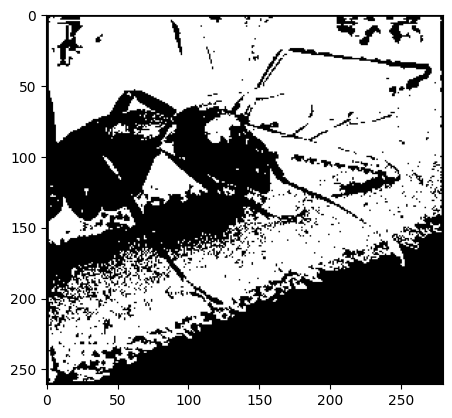

In [11]:
# 2値化画像を作成

ret, bin_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)

plt.imshow(bin_img, cmap='gray')
plt.show()

In [12]:
# ピクセル値の確認

print(bin_img)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [13]:
# データフレームに格納

bin_df = pd.DataFrame(bin_img)
print(bin_df.shape)
bin_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,255,255,0,255,255,255,255,...,255,255,255,255,255,255,255,255,0,0
3,0,0,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,0
4,0,0,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


#### 機械学習用のデータセット準備

In [14]:
# 説明変数: 画像のピクセル値
# 目的変数: 画像の被写体ラベル (🐜/🐝)

import os
import cv2
import numpy as np

dirs = ['ants', 'bees']
pixels = []
labels = []

for i, d in enumerate(dirs):
    files = os.listdir('data_03/{0:s}/'.format(d))
    
    for f in files:
        img = cv2.imread('data_03/{0:s}/{1:s}'.format(d, f), 0)
        img = cv2.resize(img, (128, 128)) # 画像を128×128にresize
        img = np.array(img).flatten().tolist() # 1次元化してリストに
        pixels.append(img)
        
        labels.append(i)

In [15]:
# データフレームに格納

import pandas as pd

pixels_df = pd.DataFrame(pixels)
pixels_df = pixels_df / 255 # 範囲変換

labels_df = pd.DataFrame(labels)
labels_df = labels_df.rename(columns={0: 'label'})

# ↑の2つを横方向に接続

img_set = pd.concat([pixels_df, labels_df], axis=1)
img_set.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.580392,0.560784,0.564706,0.498039,0.505882,0.556863,0.556863,0.549020,0.560784,0.627451,...,0.156863,0.168627,0.160784,0.156863,0.152941,0.141176,0.145098,0.133333,0.137255,0
1,0.509804,0.529412,0.556863,0.509804,0.305882,0.360784,0.505882,0.258824,0.341176,0.454902,...,0.407843,0.482353,0.584314,0.549020,0.447059,0.545098,0.521569,0.513725,0.513725,0
2,0.321569,0.321569,0.325490,0.301961,0.294118,0.301961,0.317647,0.305882,0.294118,0.278431,...,0.486275,0.474510,0.462745,0.447059,0.427451,0.411765,0.388235,0.368627,0.341176,0
3,0.152941,0.149020,0.141176,0.141176,0.141176,0.145098,0.152941,0.160784,0.172549,0.184314,...,0.203922,0.196078,0.180392,0.172549,0.160784,0.149020,0.141176,0.145098,0.137255,0
4,0.364706,0.384314,0.380392,0.388235,0.388235,0.407843,0.431373,0.458824,0.450980,0.419608,...,0.172549,0.168627,0.156863,0.200000,0.219608,0.129412,0.125490,0.141176,0.121569,0


#### モルフォロジー変換 (Morphological Transformation)

2値化画像に収縮(erosion)/膨張(dilation)/オープニング(opening)/クロージング(closing) etc. を実行

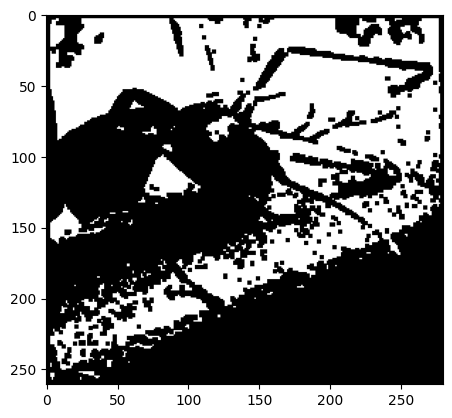

In [16]:
# 収縮
# フィルタ内のピクセル値がすべて1の時だけ白/他は0

import matplotlib.pyplot as plt

img = cv2.imread('data_03/ants/swiss-army-ant.jpg', 0)
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8) # 3×3のフィルタを用意
img_el = cv2.erode(bin_img, kernel, iterations=1) # kernelを適用してerode
plt.imshow(img_el, cmap='gray')

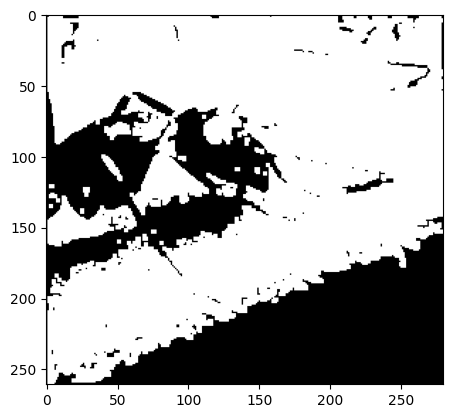

In [17]:
# 膨張
# フィルタ内のピクセル値に1つでも1があれば白/他は0

img_dl = cv2.dilate(bin_img, kernel, iterations=1)
plt.imshow(img_dl, cmap='gray')

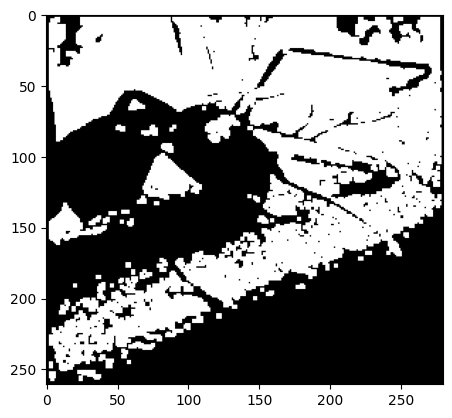

In [18]:
# オープニング
# 収縮 → 膨張

img_op = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
plt.imshow(img_op, cmap='gray')

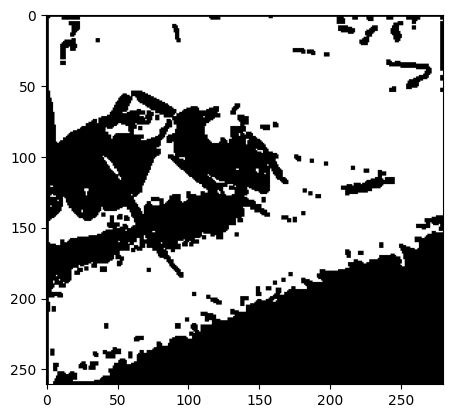

In [19]:
# クロージング
# 膨張 → 収縮

img_cl = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(img_cl, cmap='gray')

#### ヒストグラムの作成

ピクセル値ではなくて要約量を特徴量にするという発想

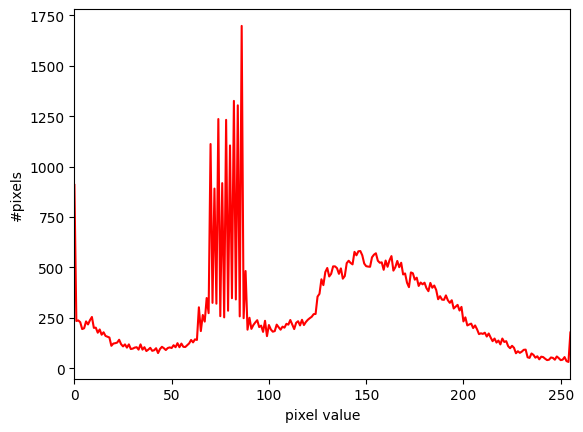

In [20]:
# ヒストグラムの作成

hist_gr, bins = np.histogram(img.ravel(), 256, [0, 256]) # ravelでピクセル値のリストを1次元化
plt.xlim(0, 255)
plt.plot(hist_gr, '-r')
plt.xlabel('pixel value')
plt.ylabel('#pixels')
plt.show()

#### PCAで次元削減

In [21]:
from sklearn.decomposition import PCA

pca = PCA(0.8) # 累積寄与率0.8で足切り
pixels_pca = pca.fit_transform(pixels_df)

print(pca.n_components_)
print(pixels_pca.shape)

65
(397, 65)


In [22]:
# PCA後のデータ

img_set_pca = pd.concat([pd.DataFrame(pixels_pca), labels_df], axis=1)
img_set_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,label
0,-0.545299,-11.867790,1.364634,-7.061757,-0.214969,3.124387,1.334680,-1.242263,0.472305,-1.540932,...,-0.281315,0.358357,0.245238,-0.379285,0.454852,0.562772,0.392569,-0.299871,0.452717,0
1,1.151356,2.848607,0.502172,3.875804,0.212847,0.090446,0.008902,0.162998,0.187677,-0.520234,...,0.273279,-0.549841,-0.139720,0.392923,0.012697,-0.201167,-0.082523,0.362443,-0.287196,0
2,-23.600067,-6.289924,2.601213,1.053150,6.236550,-4.978899,3.651000,2.913558,-4.045952,-1.969340,...,0.600584,-1.026452,0.813560,-0.163521,-0.435144,-1.260385,1.035656,1.310702,-0.023670,0
3,-24.103053,-12.195657,3.092980,-2.824235,-1.491926,-0.627614,-8.157797,8.730458,4.469848,-0.981799,...,1.237008,-0.335041,-0.221041,-1.366121,-0.264134,0.744988,-0.249572,-0.407698,-0.736059,0
4,-9.698725,-22.996808,-4.875341,-15.550552,-1.791717,-1.303824,2.720773,2.674577,3.876671,-9.758276,...,-1.788127,-0.202174,0.995561,1.459996,-2.345721,-0.352209,-0.007455,-0.088867,-0.622771,0


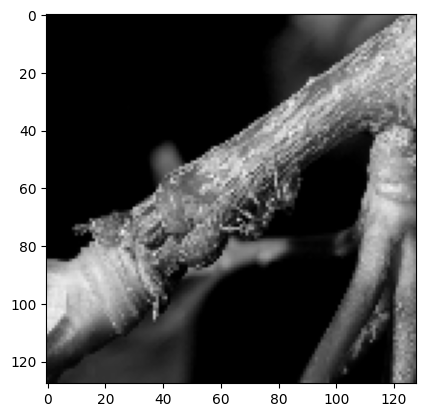

In [23]:
# 100枚目の画像を表示

plt.imshow(np.array(pixels_df)[99].reshape(128, 128), cmap='gray')

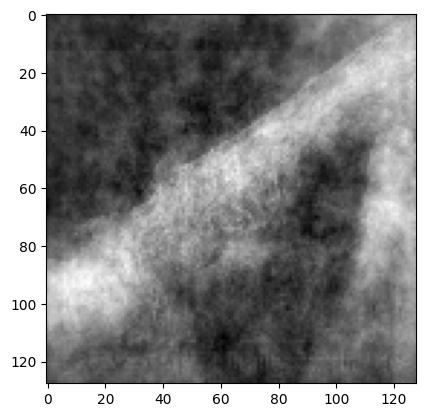

In [24]:
# PCAしてから復元した画像

pixels_low = pca.inverse_transform(pixels_pca)
plt.imshow(pixels_low[99].reshape(128, 128), cmap='gray')

#### t-SNEで次元圧縮

データの傾向を掴むために2次元に圧縮

In [25]:
# 2次元t-SNEの実行

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
pixels_tsne = tsne.fit_transform(pixels_df)

print(pixels_df.shape)
print(pixels_tsne.shape)

img_set_tsne = pd.concat([pd.DataFrame(pixels_tsne), labels_df], axis=1)
img_set_tsne.head()

(397, 16384)
(397, 2)


,0,1,label
0,0.735394,-0.768499,0
1,0.293787,1.824819,0
2,-7.773567,-4.446687,0
3,-7.908600,-3.347983,0
4,0.453915,-1.215985,0


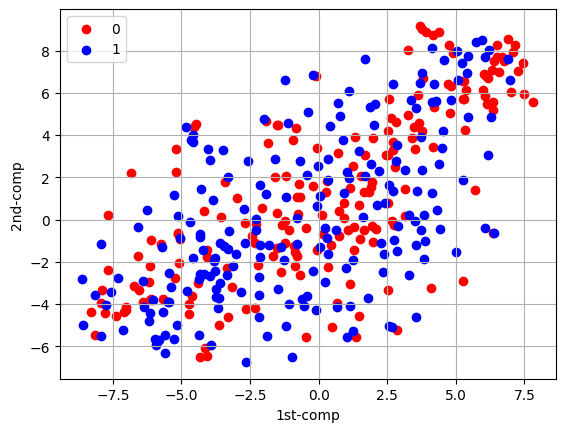

In [26]:
# t-SNEで変換した後のデータを散布図に描画

img_set_tsne_0 = img_set_tsne[img_set_tsne['label']==0]
img_set_tsne_0 = img_set_tsne_0.drop('label', axis=1)
plt.scatter(img_set_tsne_0[0], img_set_tsne_0[1], c='red', label=0)

img_set_tsne_1 = img_set_tsne[img_set_tsne['label']==1]
img_set_tsne_1 = img_set_tsne_1.drop('label', axis=1)
plt.scatter(img_set_tsne_1[0], img_set_tsne_1[1], c='blue', label=1)

plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.legend()
plt.grid()
plt.show()

# 0が🐜/1が🐝

#### CNN(Convolutional Neural Network)を用いた機械学習

#### データの作成

In [27]:
# 説明変数: 画像のピクセル値
# 目的変数: 画像の被写体ラベル (🐜/🐝)

import os
import cv2
import numpy as np

dirs = ['ants', 'bees']
pixels = []
labels = []

for i, d in enumerate(dirs):
    files = os.listdir('data_03/{0:s}/'.format(d))
    
    for f in files:
        img = cv2.imread('data_03/{0:s}/{1:s}'.format(d, f), 0)
        img = cv2.resize(img, (128, 128)) # 画像を128×128にresize
        img = np.array(img).flatten().tolist() # 1次元化してリストに
        pixels.append(img)
        
        labels.append(i)

In [28]:
# データフレームに格納

import pandas as pd

pixels_df = pd.DataFrame(pixels)
pixels_df = pixels_df / 255 # 範囲変換

labels_df = pd.DataFrame(labels)
labels_df = labels_df.rename(columns={0: 'label'})

# ↑の2つを横方向に接続

img_set = pd.concat([pixels_df, labels_df], axis=1)
img_set.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.580392,0.560784,0.564706,0.498039,0.505882,0.556863,0.556863,0.549020,0.560784,0.627451,...,0.156863,0.168627,0.160784,0.156863,0.152941,0.141176,0.145098,0.133333,0.137255,0
1,0.509804,0.529412,0.556863,0.509804,0.305882,0.360784,0.505882,0.258824,0.341176,0.454902,...,0.407843,0.482353,0.584314,0.549020,0.447059,0.545098,0.521569,0.513725,0.513725,0
2,0.321569,0.321569,0.325490,0.301961,0.294118,0.301961,0.317647,0.305882,0.294118,0.278431,...,0.486275,0.474510,0.462745,0.447059,0.427451,0.411765,0.388235,0.368627,0.341176,0
3,0.152941,0.149020,0.141176,0.141176,0.141176,0.145098,0.152941,0.160784,0.172549,0.184314,...,0.203922,0.196078,0.180392,0.172549,0.160784,0.149020,0.141176,0.145098,0.137255,0
4,0.364706,0.384314,0.380392,0.388235,0.388235,0.407843,0.431373,0.458824,0.450980,0.419608,...,0.172549,0.168627,0.156863,0.200000,0.219608,0.129412,0.125490,0.141176,0.121569,0


In [29]:
# 訓練/テストデータセットに分割
# テストデータセットの割合は20%

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(pixels, labels, test_size=0.2)

print(len(train_Y))
print(len(test_Y))

317
80


#### 画像の反転

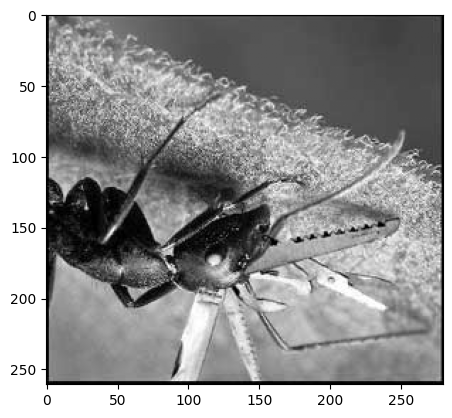

In [30]:
img = cv2.imread('data_03/ants/swiss-army-ant.jpg', 0)

x_img = cv2.flip(img, 0) # x軸で反転
y_img = cv2.flip(img, 1) # y軸で反転
xy_img = cv2.flip(img, -1) # x軸とy軸で反転

plt.imshow(x_img, cmap='gray')

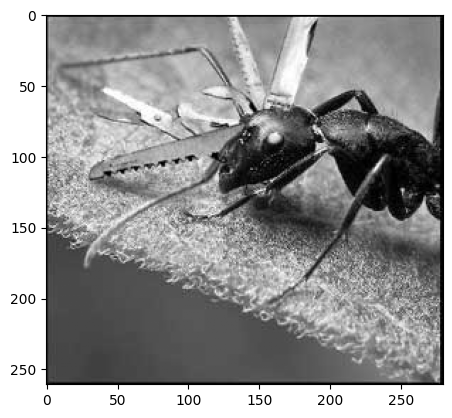

In [31]:
plt.imshow(y_img, cmap='gray')

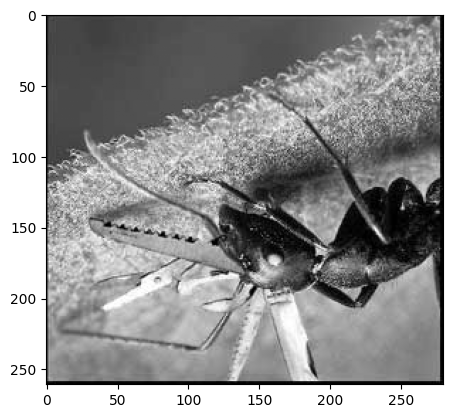

In [32]:
plt.imshow(xy_img, cmap='gray')

#### 画像の平滑化

画像の像をぼかす操作

画像の水増し(augmentation)に利用可能

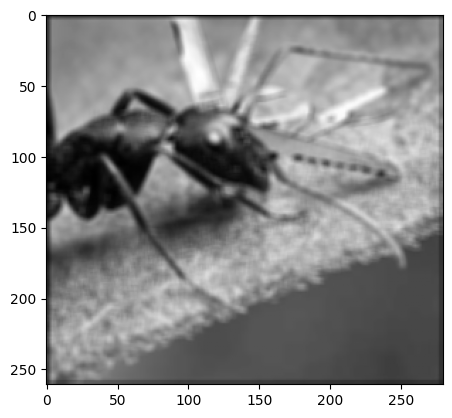

In [33]:
# 平滑化

blur_img = cv2.blur(img, (5, 5)) # 重みが一様のフィルタ
gau_img = cv2.GaussianBlur(img, (5, 5), 0) # ガウシアンフィルタ
med_img = cv2.medianBlur(img, 5) # 領域内のピクセルの中央値

plt.imshow(blur_img, cmap='gray')

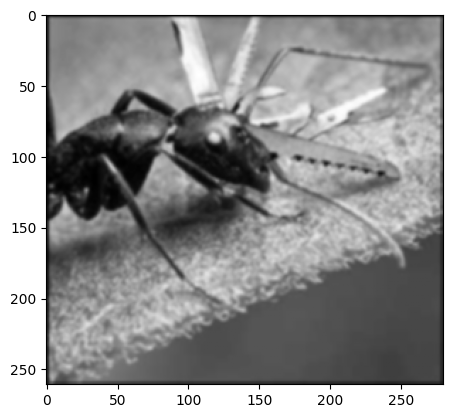

In [34]:
plt.imshow(gau_img, cmap='gray')

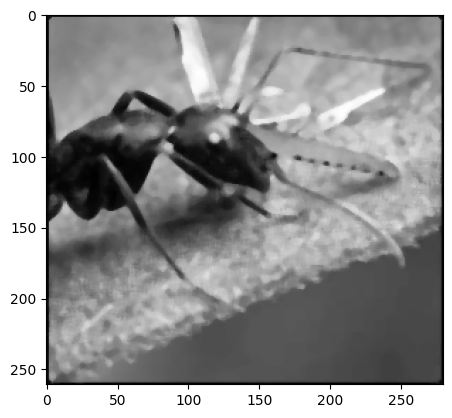

In [35]:
plt.imshow(med_img, cmap='gray')

#### 画像の明度変更

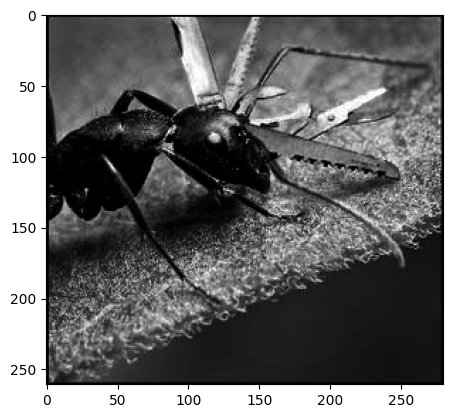

In [36]:
gamma = 0.5 # 明度の調整用

lut = np.zeros((256, 1), dtype='uint8')
for i in range(len(lut)):
    lut[i][0] = 255 * pow((float(i) / 255), 1 / gamma)
    
gamma_img = cv2.LUT(img, lut)

plt.imshow(gamma_img, cmap='gray')

#### CNNによる識別モデルの構築

conv. $\rightarrow$ max pooling $\rightarrow$ dropout $\rightarrow$ conv. $\rightarrow$ max pooling $\rightarrow$ dropout $\rightarrow$ flatten $\rightarrow$ affine $\rightarrow$ sigmoid

In [37]:
!pip install tensorflow

In [38]:
# Kerasのインストール

!pip install keras

In [39]:
# 識別モデルの構築

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/Users/shimizutoorushin/Desktop/M1_Class_program/M1_Class/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 16)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,458,241 (13.19 MB)

 Trainable params: 3,458,241 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# 改めてデータセットを作成

import os
import cv2
import numpy as np
from sklearn import model_selection

dirs = ['ants', 'bees']
pixels = []
labels = []

for i, d in enumerate(dirs):
    files = os.listdir('data_03/{0:s}/'.format(d))
    
    for f in files:
        img = cv2.imread('data_03/{0:s}/{1:s}'.format(d, f), 0)
        img = cv2.resize(img, (128, 128)) # 画像を128×128にresize
        img = np.array(img).flatten().tolist() # 1次元化してリストに
        pixels.append(img)
        
        labels.append(i)

pixels = np.array(pixels) / 255
pixels = pixels.reshape([-1, 128, 128, 1])
labels = np.array(labels)

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(pixels, labels, test_size=0.2)

print(len(train_Y))
print(len(test_Y))

317
80


In [41]:
# 学習の実行

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(train_X, train_Y, batch_size=64, verbose=1, epochs=20, validation_data=(test_X, test_Y))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.4966 - loss: 0.7152 - val_accuracy: 0.4375 - val_loss: 0.7028
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.4919 - loss: 0.6992 - val_accuracy: 0.5375 - val_loss: 0.6866
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.4765 - loss: 0.7289 - val_accuracy: 0.4500 - val_loss: 0.7028
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.5326 - loss: 0.6920 - val_accuracy: 0.5875 - val_loss: 0.6884
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.5584 - loss: 0.6847 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.5415 - loss: 0.6843 - val_accuracy: 0.5875 - val_loss: 0.6851
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.5291 - loss: 0.6897 - val_accuracy: 0.5375 - val_loss: 0.6917
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.5588 - loss: 0.6837 - val_accuracy: 0.4875 - val_loss:

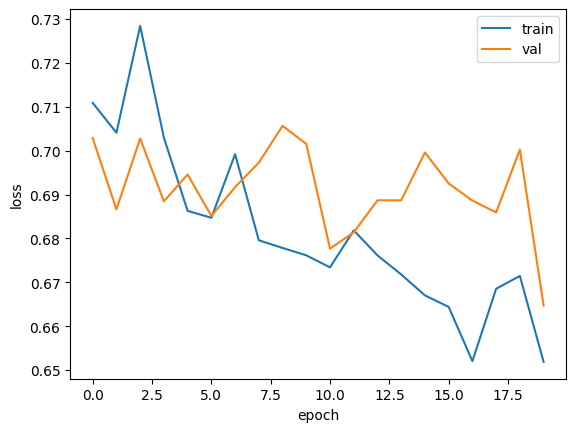

In [42]:
# epoch数と誤差の変化

import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

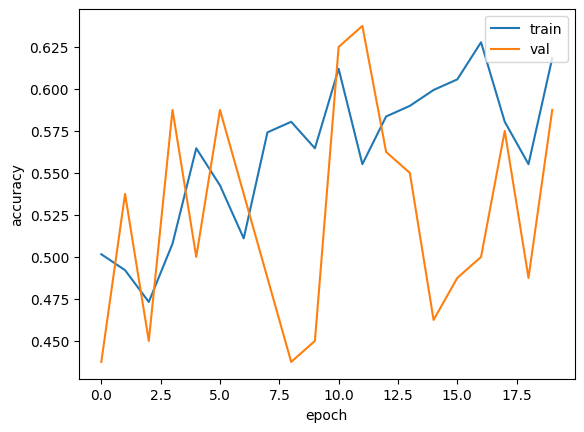

In [43]:
# 精度の変化

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### 時系列データの前処理

#### データの読み込み

In [44]:
# 電力量のデータセットを読み込み

import pandas as pd

dat_df = pd.read_csv('data_03/energydata.csv', sep=',')
dat_df.head()

# date: 日時
# Appliance: 家電の電力使用量
# lights: 照明の電力使用量
# T1/RH_1: 台所の温度/湿度
# T2/RH_2: リビングの以下略
# T3/RH_3: 洗濯室の以下略
# T4/RH_4: 事務室の以下略
# T5/RH_5: 浴室の以下略

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09


In [45]:
# データ件数と型を確認

print(dat_df.shape)
print(dat_df.dtypes)

(17424, 13)
date           object
Appliances      int64
lights          int64
T1            float64
RH_1          float64
T2            float64
RH_2          float64
T3            float64
RH_3          float64
T4            float64
RH_4          float64
T5            float64
RH_5          float64
dtype: object


In [46]:
# dateをdatetime型に変換

dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')
print(dat_df['date'].dtypes)
print(type(dat_df['date'][0]))

datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [47]:
# 時間は計測開始からの経過(分)で扱う
# まずは1つ前の項との差分を計算

dat_df['dif_min'] = dat_df['date'].diff().dt.total_seconds() / 60
dat_df['dif_min'] = dat_df['dif_min'].fillna(0) # 1番目の項が未定義になっているから0埋め
dat_df['dif_min'].head()

0     0.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: dif_min, dtype: float64

In [48]:
# 累積差分を計算

dat_df['cum_min'] = dat_df['dif_min'].cumsum()
dat_df[['date', 'cum_min']].head()

,date,cum_min
0,2016-01-11 17:00:00,0.0
1,2016-01-11 17:10:00,10.0
2,2016-01-11 17:20:00,20.0
3,2016-01-11 17:30:00,30.0
4,2016-01-11 17:40:00,40.0


In [49]:
# 欠損値の確認

print(dat_df.isnull().sum(axis=1).sort_values(ascending=False)) # 各データの欠損値
print(dat_df.isnull().sum(axis=0)) # 各項目の欠損値

9699     1
8604     1
14047    1
8586     1
11427    1
        ..
5813     0
5814     0
5815     0
5816     0
17423    0
Length: 17424, dtype: int64
date          0
Appliances    0
lights        0
T1            1
RH_1          0
T2            0
RH_2          1
T3            2
RH_3          0
T4            0
RH_4          0
T5            1
RH_5          0
dif_min       0
cum_min       0
dtype: int64


In [50]:
# 統計量の可視化

dat_df.describe()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,dif_min,cum_min
count,17424,17424.000000,17424.000000,17423.000000,17424.000000,17424.000000,17423.000000,17422.000000,17424.000000,17424.000000,17424.000000,17423.000000,17424.000000,17424.000000,17424.000000
mean,2016-03-12 04:55:00,97.136134,4.032943,21.370848,39.892301,19.960777,40.209553,21.851889,39.165869,20.437045,38.753288,19.198926,51.053839,9.999426,87115.000000
min,2016-01-11 17:00:00,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,30.663333,15.100000,27.660000,15.330000,29.815000,0.000000,0.000000
25%,2016-02-10 22:57:30,50.000000,0.000000,20.600000,37.163333,18.666667,37.863333,20.600000,36.790000,19.338333,35.326667,18.100000,45.400000,10.000000,43557.500000
50%,2016-03-12 04:55:00,60.000000,0.000000,21.390000,39.326667,19.700000,40.360000,21.790000,38.420667,20.390000,38.133333,19.100000,48.900000,10.000000,87115.000000
75%,2016-04-11 10:52:30,100.000000,0.000000,22.200000,42.566875,20.926667,43.000000,22.890000,41.433333,21.500000,41.658333,20.200000,53.830278,10.000000,130672.500000
max,2016-05-11 16:50:00,1080.000000,70.000000,25.700000,63.360000,29.856667,56.026667,27.600000,50.163333,26.200000,51.090000,25.745000,96.321667,10.000000,174230.000000
std,NaN,103.247863,8.131761,1.407637,3.716096,1.949825,3.836293,1.705699,3.210397,1.775985,4.274644,1.525227,9.092618,0.075758,50300.198807


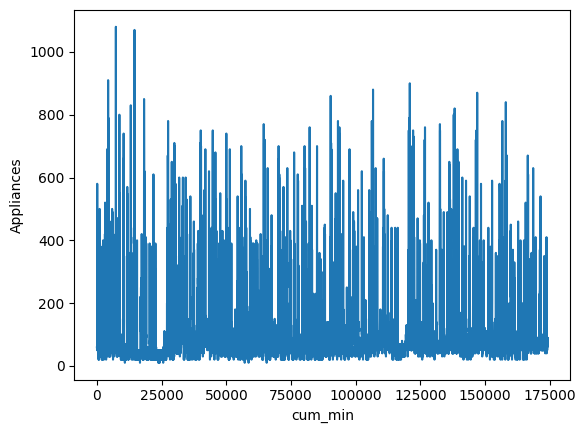

In [51]:
# データの可視化

import matplotlib.pyplot as plt

plt.plot(dat_df['cum_min'], dat_df['Appliances'])

plt.xlabel('cum_min')
plt.ylabel('Appliances')
plt.show()

#### データの前処理

In [52]:
# 改めてデータを読み込み

import pandas as pd

dat_df = pd.read_csv('data_03/energydata.csv', sep=',')
dat_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09


In [53]:
# 欠損値のある行とその前後2行を抽出

dat_df[8585:8588]

# T3にNaNあり

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
8585,2016-03-11 07:50:00,70,0,20.2,37.160000,16.5,42.430000,20.39,37.500000,19.700000,34.360000,18.000000,46.660000
8586,2016-03-11 08:00:00,280,0,20.2,37.463333,16.6,42.766667,NaN,37.500000,19.700000,34.633333,18.066667,46.193333
8587,2016-03-11 08:10:00,180,10,20.2,37.530000,16.6,42.966667,20.29,37.363333,19.666667,34.723333,18.100000,45.723333


In [54]:
# 欠損値に前の行の値を代入

dat_df[8585:8588].fillna(method='ffill')

/var/folders/wx/3cd8vjs575x297gr56v07qlm0000gn/T/ipykernel_2134/1084480114.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dat_df[8585:8588].fillna(method='ffill')


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
8585,2016-03-11 07:50:00,70,0,20.2,37.160000,16.5,42.430000,20.39,37.500000,19.700000,34.360000,18.000000,46.660000
8586,2016-03-11 08:00:00,280,0,20.2,37.463333,16.6,42.766667,20.39,37.500000,19.700000,34.633333,18.066667,46.193333
8587,2016-03-11 08:10:00,180,10,20.2,37.530000,16.6,42.966667,20.29,37.363333,19.666667,34.723333,18.100000,45.723333


In [55]:
# 線形補完
# 全体をこの方法で補完しておく

dat_df = dat_df.interpolate()
dat_df[8585:8588]

/var/folders/wx/3cd8vjs575x297gr56v07qlm0000gn/T/ipykernel_2134/4207702260.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dat_df = dat_df.interpolate()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
8585,2016-03-11 07:50:00,70,0,20.2,37.160000,16.5,42.430000,20.39,37.500000,19.700000,34.360000,18.000000,46.660000
8586,2016-03-11 08:00:00,280,0,20.2,37.463333,16.6,42.766667,20.34,37.500000,19.700000,34.633333,18.066667,46.193333
8587,2016-03-11 08:10:00,180,10,20.2,37.530000,16.6,42.966667,20.29,37.363333,19.666667,34.723333,18.100000,45.723333


#### 時間軸の作成

In [56]:
# 経過時間の計算

dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')
dat_df['dif_min'] = dat_df['date'].diff().dt.total_seconds() / 60
dat_df['dif_min'] = dat_df['dif_min'].fillna(0)
dat_df['cum_min'] = dat_df['dif_min'].cumsum()
dat_df[['date', 'cum_min']].head()

,date,cum_min
0,2016-01-11 17:00:00,0.0
1,2016-01-11 17:10:00,10.0
2,2016-01-11 17:20:00,20.0
3,2016-01-11 17:30:00,30.0
4,2016-01-11 17:40:00,40.0


In [57]:
# 経過時間(6時間)の計算
dat_df['cum_6hour'] = (dat_df['cum_min'] / 360).round(2).astype(int)

dat_df[['date', 'cum_min', 'cum_6hour']].head(50)

,date,cum_min,cum_6hour
0,2016-01-11 17:00:00,0.0,0
1,2016-01-11 17:10:00,10.0,0
2,2016-01-11 17:20:00,20.0,0
3,2016-01-11 17:30:00,30.0,0
4,2016-01-11 17:40:00,40.0,0
5,2016-01-11 17:50:00,50.0,0
6,2016-01-11 18:00:00,60.0,0
7,2016-01-11 18:10:00,70.0,0
8,2016-01-11 18:20:00,80.0,0
9,2016-01-11 18:30:00,90.0,0


#### 特徴量の作成

In [58]:
# 6時間単位で各項目の平均値を計算

dat_df = dat_df.drop(['date', 'dif_min', 'cum_min'], axis=1)
dat_df_mean = dat_df.groupby('cum_6hour').mean()

print(dat_df_mean.shape)
dat_df_mean.head()

(484, 12)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
cum_6hour,,,,,,,,,,,,
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,17.761597,60.359861
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,18.898519,50.261273
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,18.163125,50.817454
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,17.835370,50.444111
4,78.611111,7.222222,19.947963,43.275394,19.113860,42.606633,19.788704,44.312037,19.555093,42.804491,17.477870,50.732546


In [59]:
# 6時間単位で各項目の標準偏差を計算

dat_df_std = dat_df.groupby('cum_6hour').std()

print(dat_df_std.shape)
dat_df_std.head()

(484, 12)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
cum_6hour,,,,,,,,,,,,
0,131.366445,13.901582,0.672443,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611
1,101.497908,9.137399,0.460572,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389
2,104.853639,9.085135,0.103157,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170
3,95.999339,0.000000,0.059026,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715
4,83.773599,12.097488,0.151195,0.561101,0.187641,0.418215,0.048003,0.180349,0.341428,0.430826,0.075740,0.247231


In [60]:
# 上記2つのデータセットを結合

dat_features = pd.merge(dat_df_mean, dat_df_std, left_index=True, right_index=True)

print(dat_features.shape)
dat_features.head()

# "_x"が平均
# "_y"が標準偏差

(484, 24)


,Appliances_x,lights_x,T1_x,RH_1_x,T2_x,RH_2_x,T3_x,RH_3_x,T4_x,RH_4_x,...,T1_y,RH_1_y,T2_y,RH_2_y,T3_y,RH_3_y,T4_y,RH_4_y,T5_y,RH_5_y
cum_6hour,,,,,,,,,,,,,,,,,,,,,
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,...,0.672443,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,...,0.460572,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,...,0.103157,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,...,0.059026,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715
4,78.611111,7.222222,19.947963,43.275394,19.113860,42.606633,19.788704,44.312037,19.555093,42.804491,...,0.151195,0.561101,0.187641,0.418215,0.048003,0.180349,0.341428,0.430826,0.075740,0.247231


#### 目的変数の作成

In [61]:
# 電力消費量の以上が起こった日時のログを読み込み

event_df = pd.read_csv('data_03/event.csv', sep=',')
event_df.head()

,date
0,2016-01-12 10:00:00
1,2016-01-13 21:00:00
2,2016-01-14 10:00:00
3,2016-01-14 16:00:00
4,2016-01-14 17:00:00


In [62]:
# データを集約する時間軸の作成

import datetime as dt

event_df['date'] = pd.to_datetime(event_df['date'], format='%Y-%m-%d %H:%M:%S')

base_time = '2016-01-11 17:00:00' # 測定を開始した時間
event_df['dif_min'] = event_df['date'] - dt.datetime.strptime(base_time, '%Y-%m-%d %H:%M:%S')
event_df['dif_min'] = event_df['dif_min'].dt.total_seconds() / 60
event_df['cum_6hour'] = (event_df['dif_min'] / 360).round(2).astype(int)

event_df.head()

,date,dif_min,cum_6hour
0,2016-01-12 10:00:00,1020.0,2
1,2016-01-13 21:00:00,3120.0,8
2,2016-01-14 10:00:00,3900.0,10
3,2016-01-14 16:00:00,4260.0,11
4,2016-01-14 17:00:00,4320.0,12


In [63]:
# 異常が発生したとしてフラグ1を立てる

event_df['event'] = 1

# cum_6hourとeventのみ抽出

event_df = event_df[['cum_6hour', 'event']]
event_df = event_df[~event_df.duplicated()]

# cum_6hourをインデックス化

event_df = event_df.set_index(['cum_6hour'])

event_df.head()

,event
cum_6hour,
2,1
8,1
10,1
11,1
12,1


In [64]:
# 特徴量と目的変数を結合

dat_event = dat_features.join(event_df, how='left')
dat_event = dat_event.fillna(0)

print(dat_event.shape)
dat_event.head()

(484, 25)


,Appliances_x,lights_x,T1_x,RH_1_x,T2_x,RH_2_x,T3_x,RH_3_x,T4_x,RH_4_x,...,RH_1_y,T2_y,RH_2_y,T3_y,RH_3_y,T4_y,RH_4_y,T5_y,RH_5_y,event
cum_6hour,,,,,,,,,,,,,,,,,,,,,
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,...,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611,0.0
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,...,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389,0.0
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,...,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170,1.0
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,...,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715,0.0
4,78.611111,7.222222,19.947963,43.275394,19.113860,42.606633,19.788704,44.312037,19.555093,42.804491,...,0.561101,0.187641,0.418215,0.048003,0.180349,0.341428,0.430826,0.075740,0.247231,0.0


#### 別の方法で特徴量を作成

スライド窓を使って平均/標準偏差を計算

In [65]:
# 1時間分のスライド窓をずらしながら平均を計算

tmp = dat_df[dat_df['cum_6hour']==0]
tmp = tmp.drop(['cum_6hour'], axis=1)

tmp = tmp.rolling(6).mean()
tmp = tmp.dropna()

tmp

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
5,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667
6,55.000000,38.333333,19.890000,46.197778,19.200000,44.578194,19.790000,44.926111,18.914444,45.775972,17.155556,55.077778
7,55.000000,41.666667,19.884444,46.008889,19.200000,44.541111,19.780000,44.944444,18.896111,45.754444,17.144444,55.027778
8,56.666667,43.333333,19.867778,45.891806,19.200000,44.508889,19.770000,44.920556,18.890000,45.737778,17.144444,55.012778
9,60.000000,43.333333,19.862222,45.895694,19.205000,44.477222,19.770000,44.897778,18.890000,45.800000,17.133333,54.997778
10,88.333333,48.333333,19.868333,45.817361,19.231111,44.455556,19.770000,44.881111,18.890000,45.950000,17.116667,54.982778
11,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778
12,238.333333,51.666667,19.938333,46.251250,19.330000,44.422222,19.786667,44.863333,18.926667,46.162222,17.111111,54.998333
13,270.000000,50.000000,20.005556,47.445694,19.418333,44.522222,19.813333,44.962222,18.945000,46.388889,17.111111,55.042222
14,276.666667,45.000000,20.111667,49.161667,19.527778,44.755556,19.863889,45.418333,18.963333,46.873333,17.100000,55.125556


In [66]:
# numpyで整形

tmp2 = (np.array(tmp['Appliances']).tolist() + np.array(tmp['lights']).tolist() + 
        np.array(tmp['T1']).tolist() + np.array(tmp['RH_1']).tolist() + 
        np.array(tmp['T2']).tolist() + np.array(tmp['RH_2']).tolist() + 
        np.array(tmp['T3']).tolist() + np.array(tmp['RH_3']).tolist() + 
        np.array(tmp['T4']).tolist() + np.array(tmp['RH_4']).tolist() + 
        np.array(tmp['T5']).tolist() + np.array(tmp['RH_5']).tolist())

print(len(tmp2))
pd.DataFrame(tmp2).T

372


,0,1,2,3,4,5,6,7,8,9,...,362,363,364,365,366,367,368,369,370,371
0,55.0,55.0,55.0,56.666667,60.0,88.333333,176.666667,238.333333,270.0,276.666667,...,78.903333,76.02,72.648889,69.037778,64.516667,59.767222,56.83,55.170417,53.997083,53.129306


In [67]:
# 他のデータも合わせて作成

hid = dat_df['cum_6hour'].unique()

dat_slide_features = []

for i in range(len(hid)):
    tmp = dat_df[dat_df['cum_6hour'] == i]
    tmp = tmp.drop(['cum_6hour'], axis=1)

    tmp_mean = tmp.rolling(6).mean()
    tmp_mean = tmp_mean.dropna()
    tmp_std = tmp.rolling(6).mean()
    tmp_std = tmp_std.dropna()    

    tmp2 = (np.array(tmp_mean['Appliances']).tolist() + np.array(tmp_mean['lights']).tolist() + 
            np.array(tmp_mean['T1']).tolist() + np.array(tmp_mean['RH_1']).tolist() + 
            np.array(tmp_mean['T2']).tolist() + np.array(tmp_mean['RH_2']).tolist() + 
            np.array(tmp_mean['T3']).tolist() + np.array(tmp_mean['RH_3']).tolist() + 
            np.array(tmp_mean['T4']).tolist() + np.array(tmp_mean['RH_4']).tolist() + 
            np.array(tmp_mean['T5']).tolist() + np.array(tmp_mean['RH_5']).tolist() + 
            np.array(tmp_std['Appliances']).tolist() + np.array(tmp_std['lights']).tolist() + 
            np.array(tmp_std['T1']).tolist() + np.array(tmp_std['RH_1']).tolist() + 
            np.array(tmp_std['T2']).tolist() + np.array(tmp_std['RH_2']).tolist() + 
            np.array(tmp_std['T3']).tolist() + np.array(tmp_std['RH_3']).tolist() + 
            np.array(tmp_std['T4']).tolist() + np.array(tmp_std['RH_4']).tolist() + 
            np.array(tmp_std['T5']).tolist() + np.array(tmp_std['RH_5']).tolist())

    dat_slide_features.append(tmp2)

dat_slide_features = pd.DataFrame(dat_slide_features)

print(dat_slide_features.shape)
dat_slide_features.head()

(484, 744)


,0,1,2,3,4,5,6,7,8,9,...,734,735,736,737,738,739,740,741,742,743
0,55.000000,55.000000,55.000000,56.666667,60.000000,88.333333,176.666667,238.333333,270.000000,276.666667,...,78.903333,76.020000,72.648889,69.037778,64.516667,59.767222,56.830000,55.170417,53.997083,53.129306
1,56.666667,53.333333,48.333333,46.666667,43.333333,85.000000,141.666667,198.333333,255.000000,268.333333,...,50.090000,50.080000,50.065000,50.050000,50.035000,50.020000,50.005000,50.000000,50.000000,50.000000
2,43.333333,43.333333,46.666667,46.666667,45.000000,41.666667,40.000000,38.333333,35.000000,38.333333,...,52.633333,52.572222,52.305556,51.950000,51.473333,50.951111,50.407778,49.995556,49.783333,49.640000
3,55.000000,56.666667,80.000000,108.333333,126.666667,181.666667,186.666667,186.666667,203.333333,188.333333,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.010000,51.010000,51.010000,51.004444,50.987778
4,218.333333,221.666667,226.666667,203.333333,146.666667,91.666667,58.333333,53.333333,46.666667,45.000000,...,50.601111,50.536111,50.481111,50.437222,50.397222,50.362222,50.338889,50.350000,50.371667,50.427778


In [68]:
# 特徴量セットと目的変数を結合

tmp3 = dat_event[['event']]
dat_event2 = pd.concat([dat_slide_features, tmp3], axis=1)

print(dat_event2.shape)
dat_event2.head()

(484, 745)


,0,1,2,3,4,5,6,7,8,9,...,735,736,737,738,739,740,741,742,743,event
0,55.000000,55.000000,55.000000,56.666667,60.000000,88.333333,176.666667,238.333333,270.000000,276.666667,...,76.020000,72.648889,69.037778,64.516667,59.767222,56.830000,55.170417,53.997083,53.129306,0.0
1,56.666667,53.333333,48.333333,46.666667,43.333333,85.000000,141.666667,198.333333,255.000000,268.333333,...,50.080000,50.065000,50.050000,50.035000,50.020000,50.005000,50.000000,50.000000,50.000000,0.0
2,43.333333,43.333333,46.666667,46.666667,45.000000,41.666667,40.000000,38.333333,35.000000,38.333333,...,52.572222,52.305556,51.950000,51.473333,50.951111,50.407778,49.995556,49.783333,49.640000,1.0
3,55.000000,56.666667,80.000000,108.333333,126.666667,181.666667,186.666667,186.666667,203.333333,188.333333,...,51.000000,51.000000,51.000000,51.000000,51.010000,51.010000,51.010000,51.004444,50.987778,0.0
4,218.333333,221.666667,226.666667,203.333333,146.666667,91.666667,58.333333,53.333333,46.666667,45.000000,...,50.536111,50.481111,50.437222,50.397222,50.362222,50.338889,50.350000,50.371667,50.427778,0.0


#### 教師データの作成

In [69]:
# 改めてデータを読み込み
# dateとAppliancesのみ

import pandas as pd

dat_df = pd.read_csv('data_03/energydata.csv', sep=',')[['date', 'Appliances']]

dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')
dat_df.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


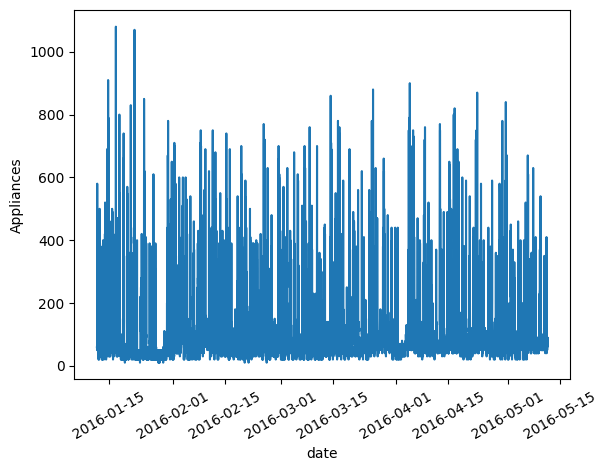

In [70]:
# 可視化

import matplotlib.pyplot as plt

plt.plot(dat_df['date'], dat_df['Appliances'])
plt.xlabel('date')
plt.xticks(rotation=30)
plt.ylabel('Appliances')
plt.show()

#### $k$-NN法による教師データ作成

In [71]:
# 2016/04/11 17:00より前を訓練データに
# ↑以降をテストデータに分割 (1ヶ月分)

train = dat_df[dat_df['date'] < '2016-04-11 17:00:00']
print(train.shape)

test = dat_df[dat_df['date'] >= '2016-04-11 17:00:00']
print(test.shape)

(13104, 2)
(4320, 2)


In [72]:
# 訓練データとテストデータを範囲変換

from sklearn.preprocessing import MinMaxScaler

mc = MinMaxScaler()
train = mc.fit_transform(train[['Appliances']])
test = mc.fit_transform(test[['Appliances']])

In [73]:
# 1日分をスライド幅として訓練データを作成

width = 144

train = train.flatten()
train_vec = []

for i in range(len(train)-width):
    train_vec.append(train[i:i+width])

print(pd.DataFrame(train_vec).shape)
pd.DataFrame(train_vec).head()

(12960, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.046729,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,...,0.028037,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037
1,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,...,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729
2,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,...,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729
3,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,...,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916
4,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,...,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794


In [74]:
# テストデータも同様に作成

test = test.flatten()
test_vec = []

for i in range(len(test)-width):
    test_vec.append(test[i:i+width])

print(pd.DataFrame(test_vec).shape)
pd.DataFrame(test_vec).head()

(4176, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.070588,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,...,0.035294,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294
1,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,...,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294
2,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,...,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412
3,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,...,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412
4,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,...,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882


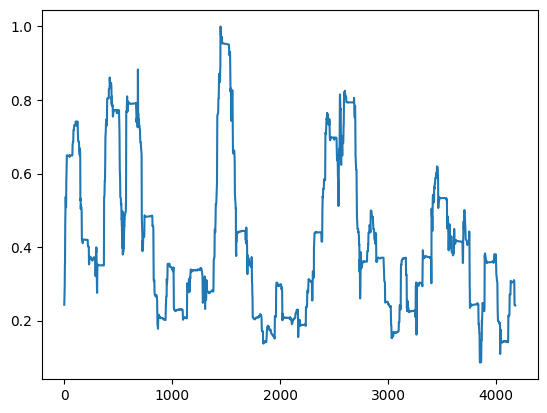

In [75]:
# k-NNでそれぞれのデータの類似度を計算

from sklearn.neighbors import NearestNeighbors
import numpy as np

train_vec = np.array(train_vec)
test_vec = np.array(test_vec)

model = NearestNeighbors(n_neighbors=1) # k=1
model.fit(train_vec)

dist, _ = model.kneighbors(test_vec)
dist = dist / np.max(dist) # 1に近いほど異常値が疑われる

plt.plot(dist)
plt.show()

#### オートエンコーダによる教師データ作成

144 (入力次元) $\rightarrow$ 128 $\rightarrow$ 64 $\rightarrow$ 32 $\rightarrow$ 64 $\rightarrow$ 128 $\rightarrow$ 144

In [76]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(144,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(144, activation='sigmoid'))

model.summary()

/Users/shimizutoorushin/Desktop/M1_Class_program/M1_Class/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 144)            │        18,576 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,904 (226.19 KB)

 Trainable params: 57,904 (226.19 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# 学習の実行

model.compile(loss='mse', optimizer='adam') # 最適化アルゴリズムはAdam
hist = model.fit(train_vec, train_vec, batch_size=128, verbose=1, epochs=20, validation_split=0.2)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0972 - val_loss: 0.0169
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0169 - val_loss: 0.0166
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0155 - val_loss: 0.0129
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0107 - val_loss: 0.0084
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0093 - val_loss: 0.0072
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080 - val_loss: 0.0057
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - val_loss: 0.0055
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - val_loss: 0.0052
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - val_loss: 0.0047
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 - val_lo

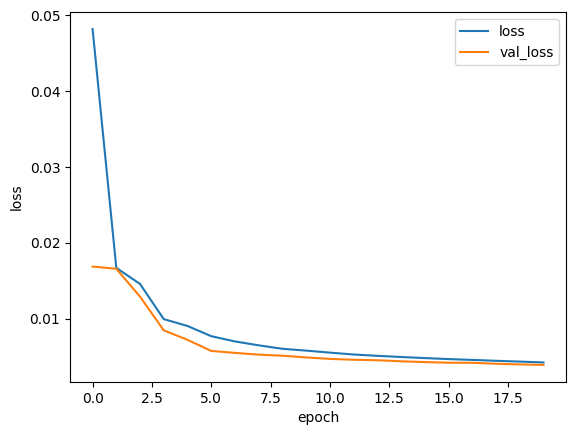

In [78]:
# 誤差の収束具合

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


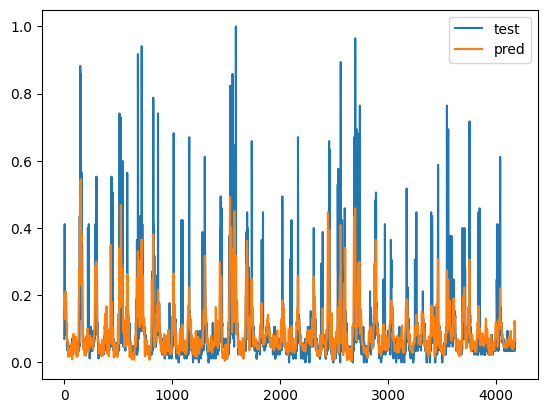

In [79]:
# テストデータと出力データの比較

pred = model.predict(test_vec)

plt.plot(test_vec[:,0], label='test')
plt.plot(pred[:,0], label='pred')
plt.legend()
plt.show()